Downloading the dataset

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d atharvadumbre/indian-sign-language-islrtc-referred

100% 608M/609M [00:31<00:00, 17.1MB/s]
100% 609M/609M [00:31<00:00, 20.3MB/s]


In [ ]:
!unzip indian-sign-language-islrtc-referred.zip

Preparing train and validation datasets

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
DIR = '/content/original_images'

In [ ]:
def train_val_generators():
    datagen = ImageDataGenerator(rescale=1.0/255.0,
                                 rotation_range=10,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.1,
                                 zoom_range=0.1,
                                 fill_mode='nearest',
                                 validation_split=0.2)

    train_generator = datagen.flow_from_directory(directory=DIR,
                                                 batch_size=100,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='training',
                                                 target_size=(224,224))

    validation_generator = datagen.flow_from_directory(directory=DIR,
                                                      batch_size=36,
                                                      class_mode='categorical',
                                                      shuffle=True,
                                                      subset='validation',
                                                      target_size=(224, 224))

    return train_generator, validation_generator


In [ ]:
train_data, val_data = train_val_generators()

Found 28800 images belonging to 36 classes.
Found 7200 images belonging to 36 classes.


Defining custum CNN architecture

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(36, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
history = model.fit(train_data, epochs=20, batch_size=100)

Epoch 1/20
288/288 [==============================] - 410s 1s/step - loss: 1.1670 - accuracy: 0.7067
Epoch 2/20
288/288 [==============================] - 393s 1s/step - loss: 0.2462 - accuracy: 0.9426
Epoch 3/20
288/288 [==============================] - 392s 1s/step - loss: 0.1234 - accuracy: 0.9731
Epoch 4/20
288/288 [==============================] - 393s 1s/step - loss: 0.0757 - accuracy: 0.9837
Epoch 5/20
288/288 [==============================] - 394s 1s/step - loss: 0.0634 - accuracy: 0.9847
Epoch 6/20
288/288 [==============================] - 395s 1s/step - loss: 0.0518 - accuracy: 0.9875
Epoch 7/20
288/288 [==============================] - 391s 1s/step - loss: 0.0422 - accuracy: 0.9892
Epoch 8/20
288/288 [==============================] - 389s 1s/step - loss: 0.0428 - accuracy: 0.9888
Epoch 9/20
288/288 [==============================] - 389s 1s/step - loss: 0.0361 - accuracy: 0.9911
Epoch 10/20
288/288 [==============================] - 392s 1s/step - loss: 0.0294 - accura

In [ ]:
preds = model.predict(val_data)
preds=np.argmax(preds,axis=-1)
print(preds[:10])
print(val_data.labels[:10])

200/200 [==============================] - 87s 426ms/step
[12  0  0  0  4  4  5 11  4  4]
[0 0 0 0 0 0 0 0 0 0]


My custum model achieved an accuracy of **65%** on validation set.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

classes = []
for i in range(36):
    if i < 10:
        cls = str(i)
    else:
        cls = chr(i+55)
    classes.append(cls)

print(classification_report(val_data.labels, preds, target_names = classes))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       200
           1       0.95      0.47      0.63       200
           2       0.42      0.52      0.46       200
           3       0.64      0.81      0.71       200
           4       0.47      0.74      0.57       200
           5       0.64      0.87      0.73       200
           6       0.48      0.52      0.50       200
           7       0.56      0.63      0.59       200
           8       0.66      0.46      0.54       200
           9       0.70      0.58      0.64       200
           A       0.86      0.85      0.86       200
           B       0.75      0.56      0.64       200
           C       0.83      0.70      0.76       200
           D       0.59      0.59      0.59       200
           E       0.66      0.47      0.55       200
           F       0.85      0.61      0.72       200
           G       0.83      0.57      0.67       200
           H       0.50    

Visualizing custum model performance

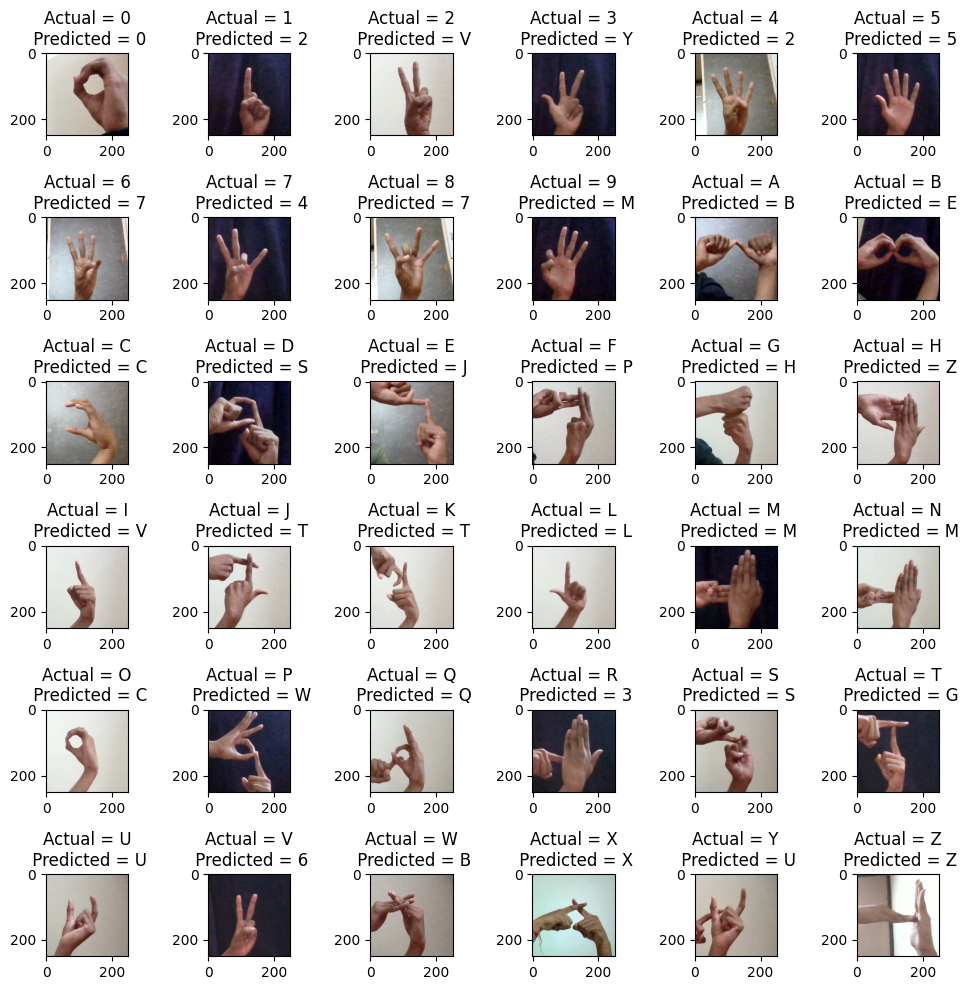

In [ ]:
def clsindex_alphaa (cls_id):
    if cls_id <10:
        return str(cls_id)
    else:
        return chr(cls_id + 55)

f, ax = plt.subplots(6,6)
f.set_size_inches(10, 10)
k = 100
for i in range(6):
    for j in range(6):
        true_cls = clsindex_alphaa(val_data.labels[k])
        pred_cls = clsindex_alphaa(preds[k])
        ax[i,j].set_title(f'Actual = {true_cls}\n Predicted = {pred_cls}')
        path = DIR + '/' + val_data.filenames[k]
        img=plt.imread(path)
        ax[i,j].imshow(img)
        k += 200
    plt.tight_layout()

Transfer Learning

* due to computational limitations, a more complex model couldn't be made. Therefore, a pre- trained model is used.



In [ ]:
pre_trained_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                                     include_top=False,
                                                     weights='imagenet')
for layer in pre_trained_model.layers:
    layer.trainable = False


9406464/9406464 [==============================] - 1s 0us/step


*   the layers of the model are freezed so that the weights don't change.


In [ ]:
pre_trained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
last_layer = pre_trained_model.get_layer('out_relu')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 1280)


*  additional layers are added to customize the model according to our use case


In [ ]:
from tensorflow.keras import layers, Model

x = layers.Flatten()(last_output)
x = BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = BatchNormalization()(x)
x = layers.Dense(16, activation='relu')(x)
x = BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = BatchNormalization()(x)
x = layers.Dense  (36, activation='softmax')(x)

model_transfer = Model(pre_trained_model.input, x)

model_transfer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
model_transfer.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history1 = model_transfer.fit(train_data, epochs=5,validation_data=val_data, batch_size = 100)

Epoch 1/5
288/288 [==============================] - 481s 2s/step - loss: 1.3181 - accuracy: 0.8156 - val_loss: 0.9795 - val_accuracy: 0.7981
Epoch 2/5
288/288 [==============================] - 463s 2s/step - loss: 0.3135 - accuracy: 0.9871 - val_loss: 0.6584 - val_accuracy: 0.8393
Epoch 3/5
288/288 [==============================] - 469s 2s/step - loss: 0.1426 - accuracy: 0.9926 - val_loss: 0.5874 - val_accuracy: 0.8439
Epoch 4/5
288/288 [==============================] - 464s 2s/step - loss: 0.0882 - accuracy: 0.9943 - val_loss: 0.5161 - val_accuracy: 0.8542
Epoch 5/5
288/288 [==============================] - 496s 2s/step - loss: 0.0613 - accuracy: 0.9958 - val_loss: 0.5256 - val_accuracy: 0.8462


In [ ]:
predictions = model_transfer.predict(val_data)
predictions=np.argmax(predictions,axis=-1)
print(predictions[:10])
print(val_data.labels[:10])

200/200 [==============================] - 91s 453ms/step
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


The accuracy is **85%** on validation set

In [ ]:
print(classification_report(val_data.labels, predictions, target_names = classes))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       200
           1       0.89      0.79      0.84       200
           2       0.67      0.54      0.59       200
           3       0.91      0.81      0.86       200
           4       0.94      0.67      0.78       200
           5       0.63      0.97      0.76       200
           6       0.83      0.82      0.82       200
           7       0.82      0.76      0.79       200
           8       0.86      0.83      0.85       200
           9       0.94      0.69      0.80       200
           A       0.93      0.86      0.89       200
           B       0.96      0.97      0.97       200
           C       0.90      0.90      0.90       200
           D       0.91      0.81      0.86       200
           E       0.81      0.82      0.82       200
           F       0.84      0.85      0.85       200
           G       0.96      0.87      0.91       200
           H       0.93    

Visualizing performance of the model

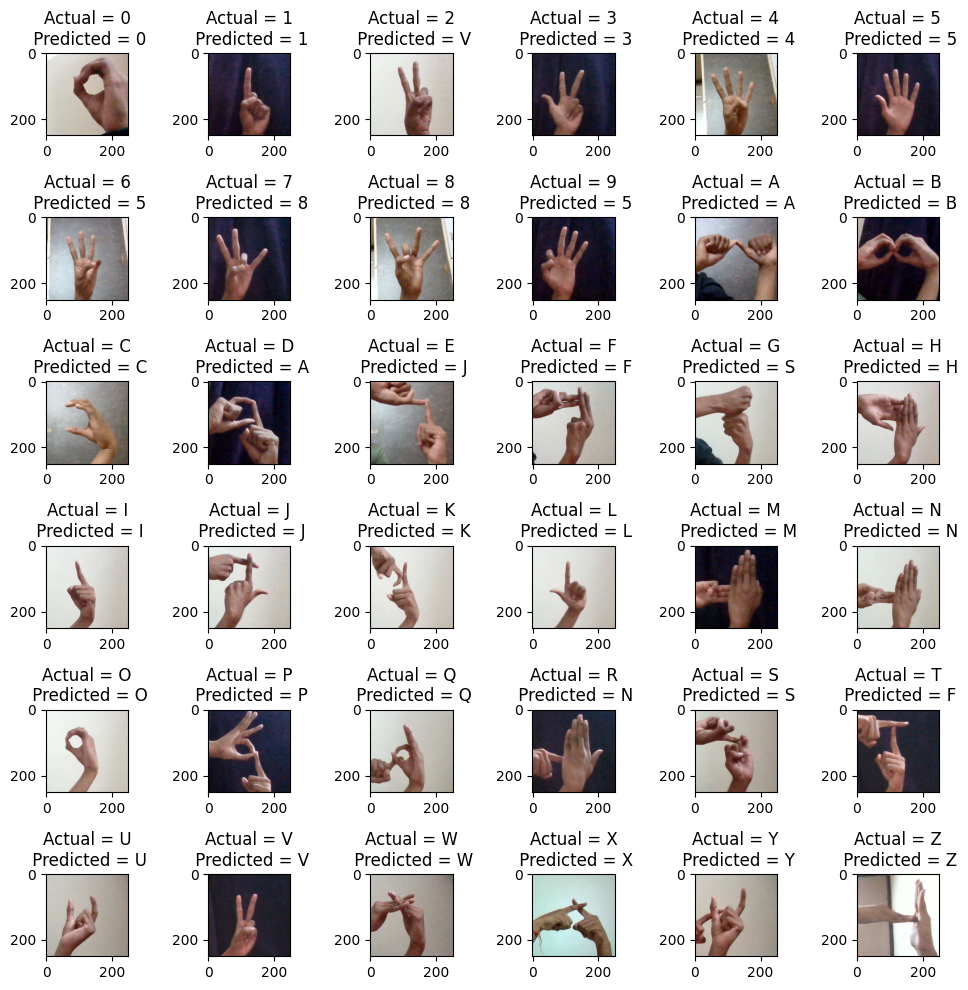

In [ ]:
f, ax = plt.subplots(6,6)
f.set_size_inches(10, 10)
k = 100
for i in range(6):
    for j in range(6):
        true_cls = clsindex_alphaa(val_data.labels[k])
        pred_cls = clsindex_alphaa(predictions[k])
        ax[i,j].set_title(f'Actual = {true_cls}\n Predicted = {pred_cls}')
        path = DIR + '/' + val_data.filenames[k]
        img=plt.imread(path)
        ax[i,j].imshow(img)
        k += 200
    plt.tight_layout()